In [1]:
from seed import set_seed
set_seed(1145)

In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep

In [2]:
import torch
# print(torch.__file__)

Linear: train_data: n = 500, d = 5, A = 0 or 1, 

In [5]:
from log_hazard_binary import g_dnn_bin
from data_generator import gendata_Linear
set_seed(1145)
patiences = 2
n_node = 64
n_layer = 3
t_nodes = 100
t_fig = 50
n_lr = 1.0e-3
n_epoch = 300
s_k = 0.1*np.arange(100)
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])

val_data = gendata_Linear(500, 0.5,beta,gamma)
test_data = gendata_Linear(500, 0.5,beta,gamma)
train_data = gendata_Linear(500, 0.5,beta,gamma)
St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X_ibs = St['S_R_X_untreat']
S_R_X_ibs1 = St['S_R_X_treated']
Lambda_R_X_untreat = St['Lambda_R_X_untreat']
Lambda_R_X_treated = St['Lambda_R_X_treated']
Cmean_R_X_untreat = St['Cmean_R_X_untreat']
Cmean_R_X_treated = St['Cmean_R_X_treated']


DNN_iteration
epoch= 0 val_loss= 3.1597018
epoch= 1 val_loss= 3.1208797
epoch= 2 val_loss= 3.0838068
epoch= 3 val_loss= 3.0478804
epoch= 4 val_loss= 3.0123785
epoch= 5 val_loss= 2.9767807
epoch= 6 val_loss= 2.94065
epoch= 7 val_loss= 2.9035683
epoch= 8 val_loss= 2.8654814
epoch= 9 val_loss= 2.826185
epoch= 10 val_loss= 2.7857692
epoch= 11 val_loss= 2.7443042
epoch= 12 val_loss= 2.7024088
epoch= 13 val_loss= 2.660432
epoch= 14 val_loss= 2.6189177
epoch= 15 val_loss= 2.578519
epoch= 16 val_loss= 2.5402346
epoch= 17 val_loss= 2.505042
epoch= 18 val_loss= 2.4738326
epoch= 19 val_loss= 2.4471157
epoch= 20 val_loss= 2.4249067
epoch= 21 val_loss= 2.4067643
epoch= 22 val_loss= 2.391806
epoch= 23 val_loss= 2.3784976
epoch= 24 val_loss= 2.3651383
epoch= 25 val_loss= 2.350477
epoch= 26 val_loss= 2.3338287
epoch= 27 val_loss= 2.314848
epoch= 28 val_loss= 2.2937176
epoch= 29 val_loss= 2.270989
epoch= 30 val_loss= 2.2471101
epoch= 31 val_loss= 2.2226553
epoch= 32 val_loss= 2.19825
epoch= 33 val_loss

In [6]:
from optITR import optITR_lin_bin
optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)

{'mis_rate': np.float64(0.03), 'Regret': np.float64(0.0005747120967172226)}

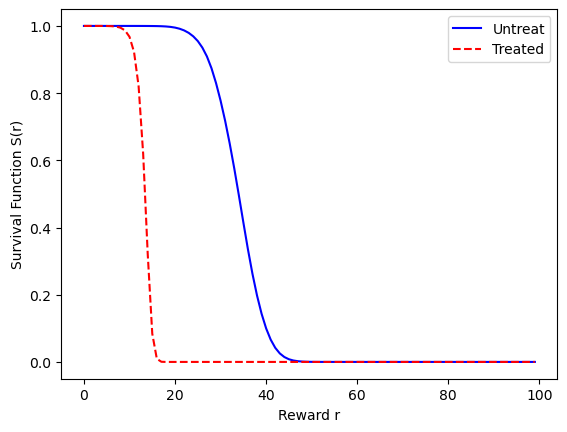

In [33]:
fd = 123
plt.plot((S_R_X_ibs[fd,:]),label = 'Untreat', color = 'blue', linestyle='-')
plt.plot((S_R_X_ibs1[fd,:]),label = 'Treated', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Survival Function S(r)')
plt.legend()

In [49]:
d_est = (Cmean_R_X_treated-Cmean_R_X_untreat)>0
d_est = d_est.astype(int)
X_test = test_data['X']
d_opt = X_test@(gamma-beta)>0 
d_opt = d_opt.astype(int)
print(np.mean(np.abs(d_opt-d_est)))  #misspecification rate
print(np.nonzero(d_opt-d_est))   #location of misspecification 

0.03
(array([ 23,  43,  46,  53,  70,  81, 112, 308, 318, 371, 404, 432, 435,
       441, 481]),)


-0.05997157
[ 0.01448989 -1.         -1.         -1.         -0.7116265 ]


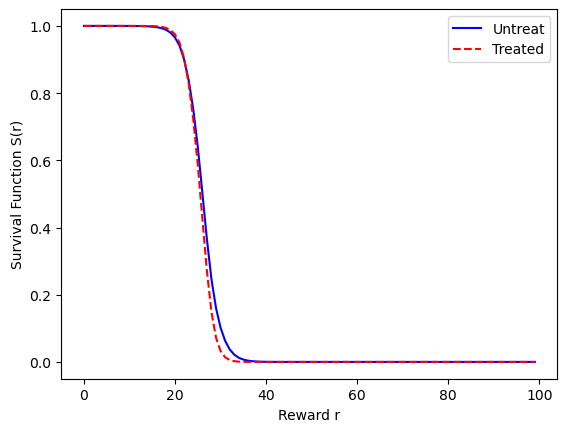

In [57]:
fd = 441
plt.plot((S_R_X_ibs[fd,:]),label = 'Untreat', color = 'blue', linestyle='-')
plt.plot((S_R_X_ibs1[fd,:]),label = 'Treated', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Survival Function S(r)')
plt.legend()
print((Cmean_R_X_treated-Cmean_R_X_untreat)[fd])
print((test_data['X'])[fd,:])

Linear: n=1000, othes are the same

In [3]:
from log_hazard_binary import g_dnn_bin
from data_generator import gendata_Linear
set_seed(1145)
patiences = 2
n_node = 64
n_layer = 3
t_nodes = 100
t_fig = 50
n_lr = 1.0e-3
n_epoch = 300
s_k = 0.1*np.arange(100)
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])

val_data = gendata_Linear(500, 0.5,beta,gamma)
test_data = gendata_Linear(500, 0.5,beta,gamma)
train_data = gendata_Linear(1000, 0.5,beta,gamma)
St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X_ibs = St['S_R_X_untreat']
S_R_X_ibs1 = St['S_R_X_treated']
Lambda_R_X_untreat = St['Lambda_R_X_untreat']
Lambda_R_X_treated = St['Lambda_R_X_treated']
Cmean_R_X_untreat = St['Cmean_R_X_untreat']
Cmean_R_X_treated = St['Cmean_R_X_treated']


DNN_iteration
epoch= 0 val_loss= 3.1596813
epoch= 1 val_loss= 3.1209927
epoch= 2 val_loss= 3.0841599
epoch= 3 val_loss= 3.0484843
epoch= 4 val_loss= 3.013226
epoch= 5 val_loss= 2.9779515
epoch= 6 val_loss= 2.9421313
epoch= 7 val_loss= 2.9053657
epoch= 8 val_loss= 2.8673348
epoch= 9 val_loss= 2.8279817
epoch= 10 val_loss= 2.7872865
epoch= 11 val_loss= 2.7452533
epoch= 12 val_loss= 2.702447
epoch= 13 val_loss= 2.6595688
epoch= 14 val_loss= 2.6172123
epoch= 15 val_loss= 2.5760427
epoch= 16 val_loss= 2.5372632
epoch= 17 val_loss= 2.5019112
epoch= 18 val_loss= 2.4707625
epoch= 19 val_loss= 2.4443846
epoch= 20 val_loss= 2.422888
epoch= 21 val_loss= 2.405733
epoch= 22 val_loss= 2.3916447
epoch= 23 val_loss= 2.3789008
epoch= 24 val_loss= 2.3656275
epoch= 25 val_loss= 2.3503282
epoch= 26 val_loss= 2.3321896
epoch= 27 val_loss= 2.3111608
epoch= 28 val_loss= 2.2874756
epoch= 29 val_loss= 2.2617528
epoch= 30 val_loss= 2.2347233
epoch= 31 val_loss= 2.2070796
epoch= 32 val_loss= 2.1793194
epoch= 33 

In [5]:
from optITR import optITR_lin_bin
optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)

{'mis_rate': np.float64(0.02), 'Regret': np.float64(0.0002237056882953281)}

In [6]:
d_est = (Cmean_R_X_treated-Cmean_R_X_untreat)>0
d_est = d_est.astype(int)
X_test = test_data['X']
d_opt = X_test@(gamma-beta)>0 
d_opt = d_opt.astype(int)
print(np.mean(np.abs(d_opt-d_est)))  #misspecification rate
print(np.nonzero(d_opt-d_est))   #location of misspecification 

0.02
(array([ 23,  46,  70,  81,  86, 154, 318, 404, 432, 442]),)


0.042159557
[ 0.20825508 -0.48507884 -0.20213912 -1.         -0.88232625]


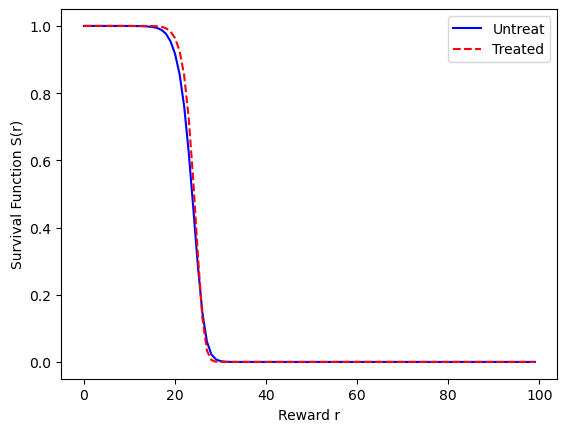

In [9]:
fd = 81
plt.plot((S_R_X_ibs[fd,:]),label = 'Untreat', color = 'blue', linestyle='-')
plt.plot((S_R_X_ibs1[fd,:]),label = 'Treated', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Survival Function S(r)')
plt.legend()
print((Cmean_R_X_treated-Cmean_R_X_untreat)[fd])
print((test_data['X'])[fd,:])

Linear: n=2000, others are the same

In [39]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
import torch
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
from log_hazard_binary import g_dnn_bin
from data_generator import gendata_Linear
set_seed(114)
patiences = 10
n_node = 50
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 1e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Linear(500, 0.5,beta,gamma)

set_seed(1167)
val_data = gendata_Linear(400, 0.5,beta,gamma)
train_data = gendata_Linear(1600, 0.5,beta,gamma)
St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X_ibs = St['S_R_X_untreat']
S_R_X_ibs1 = St['S_R_X_treated']
Lambda_R_X_untreat = St['Lambda_R_X_untreat']
Lambda_R_X_treated = St['Lambda_R_X_treated']
Cmean_R_X_untreat = St['Cmean_R_X_untreat']
Cmean_R_X_treated = St['Cmean_R_X_treated']

DNN_iteration
epoch= 0 val_loss= 2.1315742
epoch= 1 val_loss= 2.104691
epoch= 2 val_loss= 2.0797017
epoch= 3 val_loss= 2.056399
epoch= 4 val_loss= 2.0346808
epoch= 5 val_loss= 2.0143971
epoch= 6 val_loss= 1.9954965
epoch= 7 val_loss= 1.9779466
epoch= 8 val_loss= 1.9616404
epoch= 9 val_loss= 1.9464153
epoch= 10 val_loss= 1.9322184
epoch= 11 val_loss= 1.9189643
epoch= 12 val_loss= 1.9065468
epoch= 13 val_loss= 1.8949215
epoch= 14 val_loss= 1.8839517
epoch= 15 val_loss= 1.8734949
epoch= 16 val_loss= 1.8635062
epoch= 17 val_loss= 1.8540198
epoch= 18 val_loss= 1.8449286
epoch= 19 val_loss= 1.8361812
epoch= 20 val_loss= 1.8277185
epoch= 21 val_loss= 1.8194351
epoch= 22 val_loss= 1.8112701
epoch= 23 val_loss= 1.8031558
epoch= 24 val_loss= 1.7950406
epoch= 25 val_loss= 1.786902
epoch= 26 val_loss= 1.778751
epoch= 27 val_loss= 1.7705134
epoch= 28 val_loss= 1.7621685
epoch= 29 val_loss= 1.7537067
epoch= 30 val_loss= 1.745114
epoch= 31 val_loss= 1.7363687
epoch= 32 val_loss= 1.7274756
epoch= 33 v

In [40]:
from optITR import optITR_lin_bin
optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)

{'mis_rate': np.float64(0.006), 'Regret': np.float64(3.1806032397940776e-05)}

In [116]:
d_est = (Cmean_R_X_treated-Cmean_R_X_untreat)>0
d_est = d_est.astype(int)
X_test = test_data['X']
d_opt = X_test@(gamma-beta)>0 
d_opt = d_opt.astype(int)
print(np.mean(np.abs(d_opt-d_est)))  #misspecification rate
print(np.nonzero(d_opt-d_est))   #location of misspecification 

0.022
(array([ 72,  96, 169, 179, 340, 388, 401, 419, 439, 449, 489]),)


0.021528482
[0.14421585 0.30593443 0.9009619  1.         0.61388785]


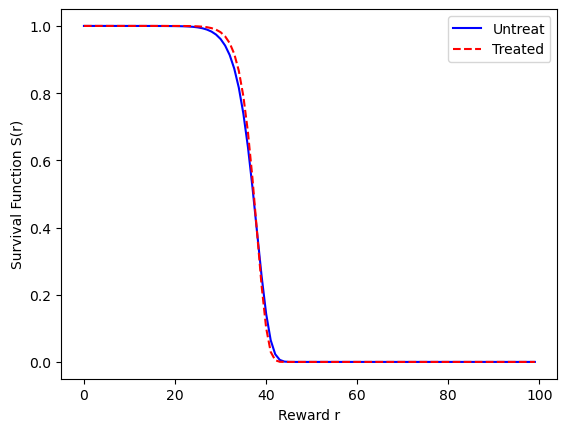

In [132]:
fd = 225
plt.plot((S_R_X_ibs[fd,:]),label = 'Untreat', color = 'blue', linestyle='-')
plt.plot((S_R_X_ibs1[fd,:]),label = 'Treated', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Survival Function S(r)')
plt.legend()
print((Cmean_R_X_treated-Cmean_R_X_untreat)[fd])
print((test_data['X'])[fd,:])

In [1]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
patiences = 10
n_node = 64
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 7e-4
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)   
    val_data = gendata_Linear(100, 0.5,beta,gamma)
    train_data = gendata_Linear(400, 0.5,beta,gamma)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L

[0.006 0.032 0.004 0.008 0.006 0.012 0.004 0.108 0.008 0.01  0.008 0.008
 0.014 0.014 0.016 0.008 0.002 0.01  0.022 0.026 0.014 0.012 0.006 0.022
 0.006 0.002 0.036 0.008 0.006 0.01  0.02  0.012 0.006 0.024 0.004 0.006
 0.008 0.008 0.006 0.018 0.01  0.006 0.036 0.01  0.012 0.034 0.01  0.008
 0.008 0.012 0.008 0.01  0.012 0.002 0.01  0.014 0.018 0.01  0.01  0.008
 0.004 0.006 0.01  0.008 0.006 0.06  0.014 0.018 0.008 0.034 0.022 0.012
 0.018 0.018 0.028 0.004 0.008 0.026 0.028 0.014 0.054 0.004 0.002 0.008
 0.066 0.014 0.008 0.012 0.012 0.012 0.048 0.012 0.004 0.014 0.016 0.006
 0.006 0.012 0.008 0.028]


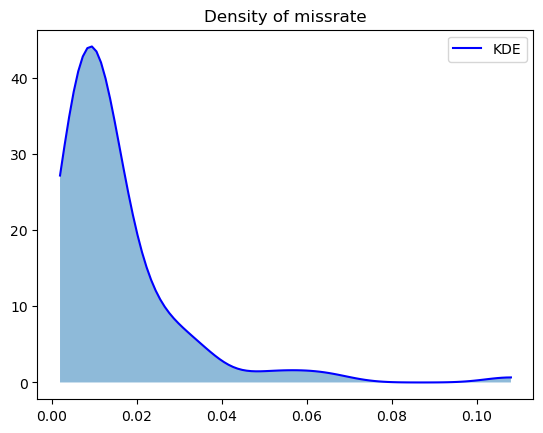

[2.09483924e-05 9.82933151e-04 1.26022771e-05 2.59715548e-05
 3.85562415e-05 6.31100572e-05 1.55027212e-05 9.28891437e-03
 1.59563131e-05 3.27013010e-05 8.80804401e-06 3.42379843e-05
 1.36204221e-04 1.24980085e-04 7.07698773e-05 1.98177589e-05
 1.19723485e-05 3.39277212e-05 1.79288990e-04 3.27500808e-04
 1.37939730e-04 4.10083897e-05 3.24024456e-05 2.05696220e-04
 3.63297930e-05 3.68510911e-06 5.71249566e-04 3.69597216e-05
 2.98617412e-05 4.44358095e-05 1.59915846e-04 1.15417301e-04
 2.83596340e-05 3.24563321e-04 4.63043757e-05 4.99894848e-05
 1.74179458e-05 1.72500199e-05 2.22864457e-05 1.97372985e-04
 1.94866858e-05 4.95444083e-05 6.39360705e-04 6.29244669e-05
 1.35164693e-04 5.34021612e-04 3.94746095e-05 3.72500617e-05
 2.17330574e-05 5.70583666e-05 2.40471056e-05 4.19253144e-05
 3.78348533e-05 1.68997244e-05 7.28042941e-05 6.56221804e-05
 1.56529833e-04 6.03035820e-05 9.57182572e-05 9.23027860e-05
 1.33692777e-05 5.13340147e-05 5.97468723e-05 4.55373011e-05
 7.73377713e-06 1.816514

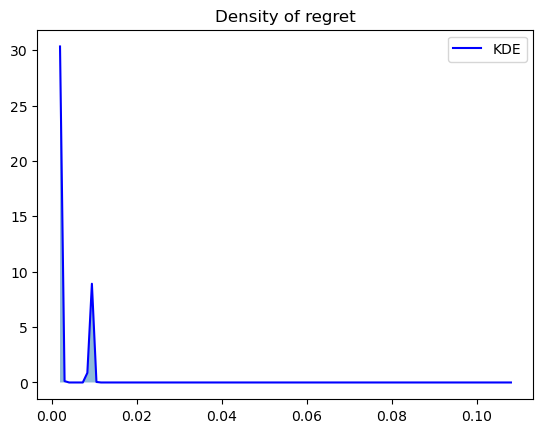

In [25]:
from scipy.stats import gaussian_kde

print(missrate)
# plt.plot(missrate)
kde1 = gaussian_kde(missrate)
xval = np.linspace(min(missrate),max(missrate),100)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density of missrate')
plt.legend()
plt.show()


print(regret)
# plt.plot(regret)
kde2 = gaussian_kde(regret)
xva2 = np.linspace(min(missrate),max(missrate),100)
yva2 = kde2(xva2)
plt.plot(xva2,yva2,label='KDE',color='blue')
plt.fill_between(xva2,yva2,alpha=0.5)
plt.title('Density of regret')
plt.legend()
plt.show()

In [7]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_deep_bin
import time
#As an example for linear case
patiences = 20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 1.6e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L

[0.03  0.046 0.044 0.048 0.05  0.04  0.05  0.052 0.036 0.03  0.032 0.036
 0.042 0.042 0.036 0.05  0.052 0.048 0.034 0.044 0.032 0.042 0.044 0.04
 0.046 0.036 0.052 0.058 0.046 0.028 0.036 0.086 0.036 0.044 0.048 0.094
 0.048 0.048 0.046 0.03  0.058 0.05  0.05  0.046 0.044 0.04  0.028 0.036
 0.04  0.034 0.042 0.04  0.046 0.044 0.05  0.044 0.042 0.048 0.042 0.042
 0.046 0.042 0.026 0.048 0.028 0.044 0.052 0.02  0.042 0.04  0.036 0.058
 0.046 0.042 0.058 0.046 0.046 0.044 0.046 0.056 0.036 0.042 0.038 0.044
 0.058 0.054 0.04  0.03  0.044 0.036 0.028 0.03  0.04  0.046 0.088 0.032
 0.042 0.024 0.042 0.044]


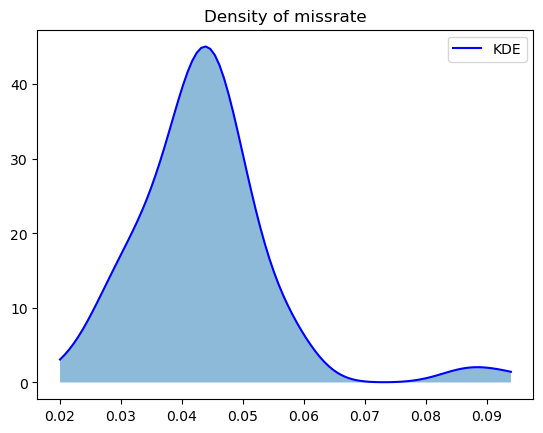

[0.00180724 0.00415362 0.00377448 0.00420705 0.003441   0.00297366
 0.00400554 0.00373462 0.00367038 0.00172281 0.00273147 0.00242301
 0.00308822 0.00299857 0.00202835 0.00418423 0.00458959 0.00292196
 0.00287513 0.0032553  0.00241935 0.00294674 0.00233385 0.00265306
 0.00379972 0.00316528 0.00531887 0.00400479 0.00308327 0.00187804
 0.0029036  0.00803425 0.00280844 0.00386193 0.00318355 0.01209757
 0.00424932 0.00321444 0.0033363  0.00203234 0.00519178 0.00360517
 0.0058149  0.00395347 0.00308857 0.00278227 0.00178114 0.00155724
 0.00295045 0.00223721 0.0027696  0.00291332 0.00483331 0.00473089
 0.00432034 0.00385911 0.00385262 0.00613491 0.00324903 0.00332327
 0.00341504 0.00359543 0.00194298 0.00269286 0.00139536 0.00294444
 0.00450315 0.00147056 0.0049239  0.00289319 0.00200884 0.00643843
 0.0044249  0.00274174 0.00607808 0.00330072 0.00382373 0.00219846
 0.0032502  0.00589127 0.00217187 0.00255534 0.00230412 0.00368791
 0.00476185 0.00669082 0.00408473 0.00166688 0.00461947 0.0023

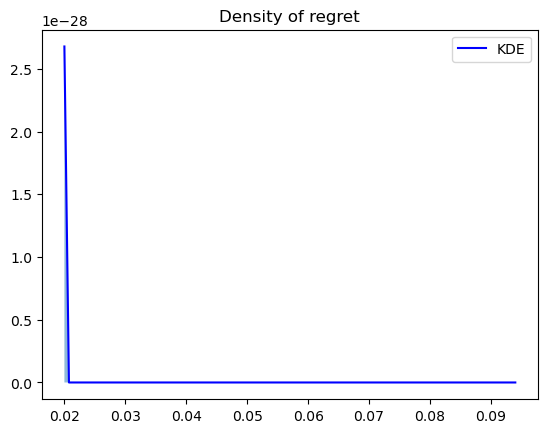

In [119]:
from scipy.stats import gaussian_kde

print(missrate)
# plt.plot(missrate)
kde1 = gaussian_kde(missrate)
xval = np.linspace(min(missrate),max(missrate),100)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density of missrate')
plt.legend()
plt.show()


print(regret)
# plt.plot(regret)
kde2 = gaussian_kde(regret)
xva2 = np.linspace(min(missrate),max(missrate),100)
yva2 = kde2(xva2)
plt.plot(xva2,yva2,label='KDE',color='blue')
plt.fill_between(xva2,yva2,alpha=0.5)
plt.title('Density of regret')
plt.legend()
plt.show()

In [5]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
import torch
from log_hazard_binary import g_dnn_bin
from data_generator import gendata_Deep
set_seed(114)
# set_seed(1145)
patiences = 20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 1.6e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)

# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Deep(500, 0.5)

set_seed(1194)

val_data = gendata_Deep(200, 0.5)
train_data = gendata_Deep(800, 0.5)
St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X_ibs = St['S_R_X_untreat']
S_R_X_ibs1 = St['S_R_X_treated']
Lambda_R_X_untreat = St['Lambda_R_X_untreat']
Lambda_R_X_treated = St['Lambda_R_X_treated']
Cmean_R_X_untreat = St['Cmean_R_X_untreat']
Cmean_R_X_treated = St['Cmean_R_X_treated']

DNN_iteration
epoch= 0 val_loss= 3.2720804
epoch= 1 val_loss= 3.1959095
epoch= 2 val_loss= 3.1217608
epoch= 3 val_loss= 3.0490258
epoch= 4 val_loss= 2.9763818
epoch= 5 val_loss= 2.9047565
epoch= 6 val_loss= 2.835238
epoch= 7 val_loss= 2.7690046
epoch= 8 val_loss= 2.7077405
epoch= 9 val_loss= 2.6532989
epoch= 10 val_loss= 2.607564
epoch= 11 val_loss= 2.571386
epoch= 12 val_loss= 2.5446782
epoch= 13 val_loss= 2.525858
epoch= 14 val_loss= 2.5120242
epoch= 15 val_loss= 2.4996958
epoch= 16 val_loss= 2.4858785
epoch= 17 val_loss= 2.4684904
epoch= 18 val_loss= 2.446523
epoch= 19 val_loss= 2.419817
epoch= 20 val_loss= 2.3890963
epoch= 21 val_loss= 2.3556144
epoch= 22 val_loss= 2.3212552
epoch= 23 val_loss= 2.287423
epoch= 24 val_loss= 2.255101
epoch= 25 val_loss= 2.2242374
epoch= 26 val_loss= 2.1947143
epoch= 27 val_loss= 2.1656072
epoch= 28 val_loss= 2.1364243
epoch= 29 val_loss= 2.1068978
epoch= 30 val_loss= 2.0771198
epoch= 31 val_loss= 2.0470994
epoch= 32 val_loss= 2.0169659
epoch= 33 val_

In [6]:
from optITR import optITR_deep_bin
optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)

{'mis_rate': np.float64(0.042), 'Regret': np.float64(0.014729204768817006)}

In [7]:
d_est = (Cmean_R_X_treated-Cmean_R_X_untreat)>0
d_est = d_est.astype(int)
X = test_data['X']
g_X = test_data['g_X']
h_X = test_data['h_X']
# g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
    #A=1, influence h_X
# h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
            # - (np.log(X[:,4]+2))/3 -1
d_opt = (h_X-g_X)>0
d_opt = d_opt.astype(int)
print(np.mean(np.abs(d_opt-d_est)))  #misspecification rate
print(np.nonzero(d_opt-d_est)) 

0.164
(array([  1,   2,   4,  12,  25,  28,  31,  33,  36,  37,  53,  59,  61,
        67,  76,  82,  84,  99, 105, 110, 117, 123, 127, 133, 159, 168,
       175, 176, 193, 196, 197, 204, 234, 237, 250, 266, 269, 272, 277,
       278, 284, 285, 288, 290, 303, 306, 309, 312, 314, 317, 319, 322,
       323, 324, 326, 346, 351, 352, 356, 365, 367, 376, 390, 393, 395,
       415, 421, 430, 438, 441, 443, 452, 462, 465, 466, 469, 476, 478,
       479, 486, 494, 497]),)


-0.09070468
[-1.          1.         -1.         -0.06100253 -1.        ]
1.1959661


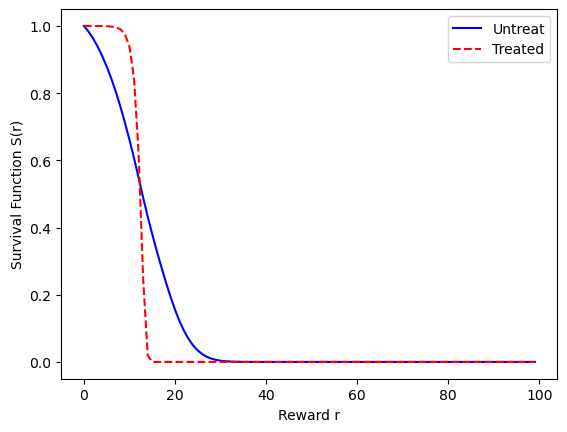

In [8]:
fd = 443
plt.plot((S_R_X_ibs[fd,:]),label = 'Untreat', color = 'blue', linestyle='-')
plt.plot((S_R_X_ibs1[fd,:]),label = 'Treated', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Survival Function S(r)')
plt.legend()
print((Cmean_R_X_treated-Cmean_R_X_untreat)[fd])
print((test_data['X'])[fd,:])
print((test_data['h_X']-test_data['g_X'])[fd])

In [1]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
import torch
from log_hazard_binary import g_dnn_bin
from data_generator import gendata_Deep
set_seed(114)
# set_seed(1145)
patiences = 30
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 1e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)

beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Linear(500, 0.5,beta,gamma)

set_seed(1188)
val_data = gendata_Linear(400, 0.5,beta,gamma)
train_data = gendata_Linear(1600, 0.5,beta,gamma)



In [16]:
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
# beta = 0.5*np.array([0,-1,1,-0.5,1])
# gamma = 0.5*np.array([1,-0.5,0,1,-0.5])

test_data = gendata_Linear(500, 0.5,beta,gamma)

set_seed(1162)
val_data = gendata_Linear(100, 0.5,beta,gamma)
train_data = gendata_Linear(400, 0.5,beta,gamma)

resl = E_ols_bin(train_data, val_data, test_data, regu = 0)
print(resl['zeta'])
print((resl['beta'])[-0]-beta)
print((resl['gamma'])[-0]-gamma)
Cmean_R_X_treated = resl['Cmean_R_X_treated']
Cmean_R_X_untreat = resl['Cmean_R_X_untreat']
itr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
print(itr['mis_rate'])

[ 0.49976838  0.33384161 -0.41701697  0.50006963 -0.25017044 -0.08330839]
[-0.08323211  0.41676789 -0.58323211  0.16676789 -0.58323211]
[-0.08292628  0.66707372  0.41707372 -0.08292628  0.66707372]
0.0


In [1]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)   
    val_data = gendata_Linear(100, 0.5,beta,gamma)
    train_data = gendata_Linear(400, 0.5,beta,gamma)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L

[0.002 0.    0.    0.    0.    0.002 0.    0.    0.002 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.002 0.    0.    0.
 0.    0.    0.    0.002 0.    0.002 0.    0.    0.    0.    0.    0.
 0.    0.002 0.    0.    0.    0.    0.002 0.    0.    0.    0.002 0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.004
 0.004 0.004 0.002 0.    0.    0.    0.    0.    0.    0.    0.002 0.
 0.    0.    0.    0.    0.    0.    0.    0.002 0.    0.    0.    0.
 0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.    0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.    0.
 0.002 0.    0.    0.    0.    0.002 0.002 0.    0.002 0.    0.    0.002
 0.    0.    0.    0.    0.002 0.    0.    0.    0.    0.002 0.    0.
 0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.002 0.    0.    0.    0.    0.    0.    0.    0.002 0.    0.    0.
 0.    0

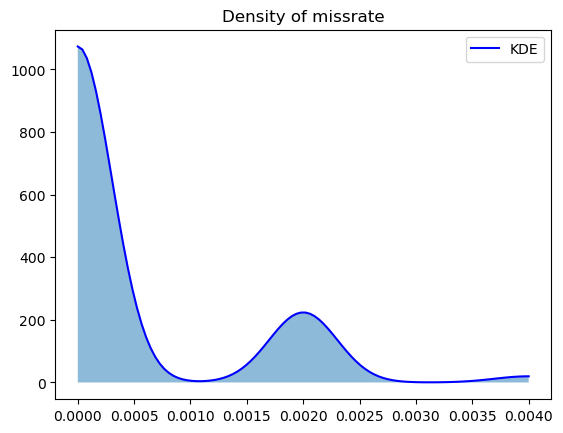

[2.81774564e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.42464685e-06 0.00000000e+00 0.00000000e+00
 3.42464685e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.42464685e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.81774564e-06
 0.00000000e+00 3.42464685e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.81774564e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.42464685e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.81774564e-06 3.42464685e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.34589771e-05
 2.34589771e-05 2.28520759e-05 2.81774564e-06 0.00000000e+00
 0.00000000e+00 0.000000

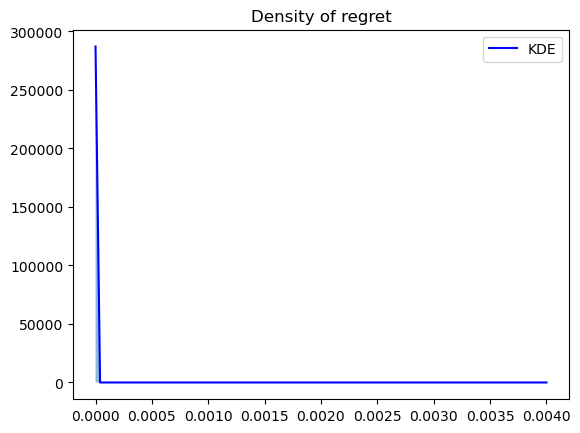

In [6]:
from scipy.stats import gaussian_kde

print(missrate)
# plt.plot(missrate)
kde1 = gaussian_kde(missrate)
xval = np.linspace(min(missrate),max(missrate),100)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density of missrate')
plt.legend()
plt.show()


print(regret)
# plt.plot(regret)
kde2 = gaussian_kde(regret)
xva2 = np.linspace(min(missrate),max(missrate),100)
yva2 = kde2(xva2)
plt.plot(xva2,yva2,label='KDE',color='blue')
plt.fill_between(xva2,yva2,alpha=0.5)
plt.title('Density of regret')
plt.legend()
plt.show()

In [6]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i}", end='\r')
    val_data = gendata_Deep(100, 0.5)
    train_data = gendata_Deep(400, 0.5)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 199
0.31087
0.01572205775336041
0.23888983530331104
0.025396019201783606


ELS method test area

In [1]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
import torch
from log_hazard_binary import g_dnn_bin
from log_dls_binary import E_dls_bin
from data_generator import gendata_Deep
set_seed(114)
# set_seed(1145)
patiences = 10
n_node = 64
n_layer = 2
n_lr = 1.2e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)

# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Deep(500, 0.5)

set_seed(1244)

val_data = gendata_Deep(200, 0.5)
train_data = gendata_Deep(800, 0.5)
Res = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences)
Cmean_R_X_untreat = Res['Cmean_R_X_untreat']
Cmean_R_X_treated = Res['Cmean_R_X_treated']
mu_base_test = Res['mu_base_test']
mu_un_test = Res['mu_un_test']
mu_tr_test = Res['mu_tr_test']

DNN_iteration
epoch= 0 val_loss= 1.2974253
epoch= 1 val_loss= 1.2062129
epoch= 2 val_loss= 1.1168782
epoch= 3 val_loss= 1.0281951
epoch= 4 val_loss= 0.9400965
epoch= 5 val_loss= 0.8529856
epoch= 6 val_loss= 0.76701707
epoch= 7 val_loss= 0.68305606
epoch= 8 val_loss= 0.6032298
epoch= 9 val_loss= 0.5294956
epoch= 10 val_loss= 0.46521458
epoch= 11 val_loss= 0.4137299
epoch= 12 val_loss= 0.37809086
epoch= 13 val_loss= 0.35878173
epoch= 14 val_loss= 0.35392198
epoch= 15 val_loss= 0.35792613
patience_counter = 1
epoch= 16 val_loss= 0.3630823
patience_counter = 2
epoch= 17 val_loss= 0.36327255
patience_counter = 3
epoch= 18 val_loss= 0.35673252
patience_counter = 4
epoch= 19 val_loss= 0.3449064
epoch= 20 val_loss= 0.33108017
epoch= 21 val_loss= 0.31848237
epoch= 22 val_loss= 0.3093449
epoch= 23 val_loss= 0.30447695
epoch= 24 val_loss= 0.3034877
epoch= 25 val_loss= 0.30528784
patience_counter = 1
epoch= 26 val_loss= 0.30841333
patience_counter = 2
epoch= 27 val_loss= 0.311641
patience_counter 

In [2]:
from optITR import optITR_deep_bin
optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)

{'mis_rate': np.float64(0.042), 'Regret': np.float64(0.0027191788554191687)}

In [4]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_dls_binary import E_dls_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 100
patiences = 20
n_node = 64
n_layer = 2
n_lr = 1.2e-3
n_epoch = 1000
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L

LASSO, Qian and Murphy (2011)

In [4]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)   
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L

In [7]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print('Loop time:', i+1)
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)

print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Loop time: 1
Loop time: 2
Loop time: 3
Loop time: 4
Loop time: 5
Loop time: 6
Loop time: 7
Loop time: 8
Loop time: 9
Loop time: 10
Loop time: 11
Loop time: 12
Loop time: 13
Loop time: 14
Loop time: 15
Loop time: 16
Loop time: 17
Loop time: 18
Loop time: 19
Loop time: 20
Loop time: 21
Loop time: 22
Loop time: 23
Loop time: 24
Loop time: 25
Loop time: 26
Loop time: 27
Loop time: 28
Loop time: 29
Loop time: 30
Loop time: 31
Loop time: 32
Loop time: 33
Loop time: 34
Loop time: 35
Loop time: 36
Loop time: 37
Loop time: 38
Loop time: 39
Loop time: 40
Loop time: 41
Loop time: 42
Loop time: 43
Loop time: 44
Loop time: 45
Loop time: 46
Loop time: 47
Loop time: 48
Loop time: 49
Loop time: 50
Loop time: 51
Loop time: 52
Loop time: 53
Loop time: 54
Loop time: 55
Loop time: 56
Loop time: 57
Loop time: 58
Loop time: 59
Loop time: 60
Loop time: 61
Loop time: 62
Loop time: 63
Loop time: 64
Loop time: 65
Loop time: 66
Loop time: 67
Loop time: 68
Loop time: 69
Loop time: 70
Loop time: 71
Loop time: 72
L